In [42]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Introduction

## Symmetries

**Symmetries** provide one of the key ideas in modern mathematics and physics. They are naturally associated with the notion of **groups**. A typical problem in this context is to construct a system that behaves in a certain way under the action of a symmetry, for example, a system that is invariant under a given symmetry. 

To tackle this kind of problems, we need to know how the symmetries act on the building blocks of systems and these blocks are often the elements of vector spaces, i.e. vectors. This leads to a natural question of how to classify such actions of groups on vector spaces. The mathematical theory that deals with this question is the **representation theory**.

$$
\begin{array}{cc}
\mathrm{Physics}&&\mathrm{Mathematics}\\
\mathrm{symmetry}&\leftrightarrow&\mathrm{group}
\end{array}
$$

Many systems in classical and quantum physics are invariant under some symmetry operations. We distinguish two types of symmetries: **discrete** and **continuous** symmetries. 

In the first cathegory we have for example
* reflection (parity) symmetry
* discrete rotations
* time reversal
* CPT symmetry of the Standard Model

Continuous symmetries include:
* time translations
* space translations
* spatial rotations
* Poincare transformations
* gauge symmetries of quuntum field theories

Each symmetry can be described mathematically using groups and their representations.

## First look at groups and representations

Consider the following square in 2D space:

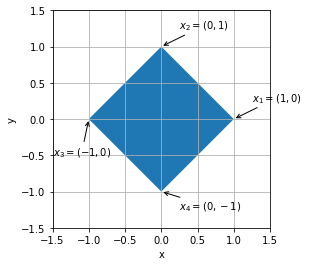

In [77]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

pts = np.array([[0,1], [1,0], [0,-1],[-1,0]])
p = Polygon(pts, closed=True)
ax = plt.gca()
ax.set_aspect('equal', 'box')
ax.grid()
ax.add_patch(p)
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.annotate("$x_2=(0,1)$", xy=(0, 1), xytext=(0.25, 1.25),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("$x_1=(1,0)$", xy=(1,0), xytext=(1.25, 0.25),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("$x_3=(-1,0)$", xy=(-1,0), xytext=(-1.5, -0.5),
            arrowprops=dict(arrowstyle="->"))
ax.annotate("$x_4=(0,-1)$", xy=(0,-1), xytext=(0.25, -1.25),
            arrowprops=dict(arrowstyle="->"))
plt.show()


It is symmetric under rotations and reflections. For example: the rotation by $90^\circ$ clockwise does not change the shape of the square. However, it **permutes** its vertices in the following way:

$$x_1\to x_4\to x_3 \to x_2 \to x_1$$

We associate a *permutation* to this symmetry: $(1432)$.

Another example: lreflection with respect to the $x$-axis. It permutes vertices:

$$x_2 \to x_4 \to x_2,$$

and $x_1$ and $x_3$ are unchanged.
We associate another permutation to this symmetry: $(1)(3)(24)=(24)$.

There are 8 such symmetries in total (four rotations and four reflections):
* $e_1=id$ - identity
* $e_2=(1432)$ - rotation by $90^\circ$ clockwise
* $e_3=(13)(24)$ - rotation by $180^\circ$ clockwise
* $e_4=(1234)$ - rotation by $270^\circ$ clockwise
* $e_5=(24)$ - $x$-axis reflection 
* $e_6=(13)$ - $y$-axis reflection
* $e_7=(14)(23)$ - reflection with respect to the top-left to bottom-right diagonal
* $e_8=(12)(34)$ - reflection with respect to the top-right to bottom-left diagonal

Two symmetries applied one after another is also a symmetry: $e_2$ followed by $e_2$ is $e_3$. We indicate it as 

$$e_2 \star e_2 =e_3$$

where $\star$ is a multiplication of group elements (binary operation). This can be done using vertex permutations:

$$(1432)\circ(1432) =(13)(24)$$

where we used the symbol $\circ$ to indicate multiplication (composition) of permutations.

One can construct a table collecting all results of multiplications of two symmetries - **Cayley table**.

This group is called the **dihedral group $D_4$**

$$
\begin{array}{c||c|c|c|c|c|c|c|c}
\star&e_1&e_2&e_3&e_4&e_5&e_6&e_7&e_8\\
\hline
\hline
e_1&e_1&e_2&e_3&e_4&e_5&e_6&e_7&e_8\\
\hline
e_2&e_2&e_3&e_4&e_1&e_7&e_8&e_6&e_5\\
\hline
e_3&e_3&e_4&e_1&e_2&e_6&e_5&e_8&e_7\\
\hline
e_4&e_4&e_1&e_2&e_3&e_8&e_7&e_5&e_6\\
\hline
e_5&e_5&e_8&e_6&e_7&e_1&e_3&e_4&e_2\\
\hline
e_6&e_6&e_7&e_5&e_8&e_3&e_1&e_2&e_4\\
\hline
e_7&e_7&e_5&e_8&e_6&e_2&e_4&e_1&e_3\\
\hline
e_8&e_8&e_6&e_7&e_5&e_4&e_2&e_3&e_1
\end{array}
$$

Some important observations from this table:
* each element appears only once in each column and in each row
* the element $e_1$ acts as the identity element, namely

$$e_1 \star e_i=e_i\star e_1=e_i$$

* every element has its inverse, i.e. for each $e_i$ there exists $e_j$ such that

$$e_i\star e_j=e_j\star e_i=e_1$$

These are common properties for all groups.

Groups are very abstract mathematical objects that are defined as a set with binary operation of its elements satisfying a series of conditions. We are interested in representing these elements in such a way that we can see how group elements act on the square. We can do it by associating $2\times 2$ matrices to each group element:

$$
\begin{align*}
&e_1 \to \begin{pmatrix}1&0\\0&1\end{pmatrix}\qquad & e_2 \to \begin{pmatrix}0&1\\-1&0\end{pmatrix}\qquad
&e_3 \to \begin{pmatrix}-1&0\\0&-1\end{pmatrix}\qquad & e_4 \to \begin{pmatrix}0&-1\\1&0\end{pmatrix}\\
&e_5 \to \begin{pmatrix}1&0\\0&-1\end{pmatrix}\qquad & e_6 \to \begin{pmatrix}1&0\\0&-1\end{pmatrix}\qquad
&e_7 \to \begin{pmatrix}0&-1\\-1&0\end{pmatrix}\qquad & e_8 \to \begin{pmatrix}0&1\\1&0\end{pmatrix}\\
\end{align*}
$$

These matrices satisfy the same multiplication table as the group elements. We call these set of matrices a representation of group $D_4$. This is not the only representation and we will discuss many more of them in this module.